In [ ]:
import skimage
import napari
from tifffile import imread
from pathlib import Path

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

In [ ]:
# You might need to modify the path according to where you saved your dataset
# Note that the `Path` library will deal with OS dependant path issues
path_img = Path('placozoan-movie.tif')
path_label = Path('imseq_mask_filtered.tif')
img = imread(path_img)
labels = imread(path_label)

In [170]:
# temp
img = img[:10]
labels = labels[:10].astype(np.int8)

In [66]:
viewer = napari.Viewer()

In [67]:
viewer.add_image(img)
viewer.add_labels(labels)

<Labels layer 'labels' at 0x20405b9dc00>

In [185]:
ppties=pd.DataFrame(regionprops_table(   
        labels[0],
        intensity_image=img[0],
        properties=['label','centroid','area', 'eccentricity','perimeter','orientation'],
    ))

In [186]:
for t in range (1,len(labels)) :
    other_timepoints=pd.DataFrame(regionprops_table(   
        labels[t]*(t+1),
        intensity_image=img[t],
        properties=['label','centroid','area', 'eccentricity','perimeter','orientation'],
    ))
    ppties=pd.concat([ppties, other_timepoints])

In [187]:
ppties

,label,centroid-0,centroid-1,area,eccentricity,perimeter,orientation
0,1,342.618081,313.910348,221657,0.260201,1922.528137,0.605789
0,2,342.981619,313.418401,222189,0.242104,2000.025612,0.601788
0,3,342.862135,313.432613,222224,0.243181,1963.569768,0.618400
0,4,343.175570,313.214915,222413,0.233321,2011.055049,0.616752
0,5,343.097618,313.134475,222458,0.228436,1998.605302,0.653314
0,6,343.155354,313.045856,222544,0.221459,1970.120021,0.694165
0,7,343.202177,312.526582,222894,0.209603,1945.463166,0.855846
0,8,343.373059,312.379723,222986,0.207208,1975.498700,0.902721
0,9,343.248008,312.277814,223009,0.212467,1937.770778,0.937923
0,10,343.476483,312.149155,223070,0.212285,1939.498700,0.985703


In [188]:
ppties.to_csv(Path('C:/Users/gros/Desktop/HACKATON/ppties.csv'),sep=';')

In [ ]:
#metric
def inertia(egion):
    y0, x0 = region.centroid
    orientation = region.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * region.axis_minor_length
    y1 = y0 - math.sin(orientation) * 0.5 * region.axis_minor_length
    x2 = x0 - math.sin(orientation) * 0.5 * region.axis_major_length
    y2 = y0 - math.cos(orientation) * 0.5 * region.axis_major_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = region.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)


222189
222224
222413
222458
222544
222894
222986
223009
223070
[222189, 222224, 222413, 222458, 222544, 222894, 222986, 223009, 223070]


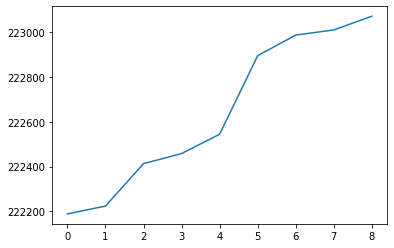

In [183]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


#print(len(labels))


areas = []
# label image regions
for label_image in range(len(labels)-1):
    i = int(label_image + 1)
    image = img[i]
    bw = labels[i]
    # to make the background transparent, pass the value of `bg_label`,
    # and leave `bg_color` as `None` and `kind` as `overlay`
    image_label_overlay = label2rgb(bw, image=image, bg_label=0)

    #fig, ax = plt.subplots(figsize=(10, 6))
    #ax.imshow(image_label_overlay)


    for region in regionprops(bw):
        print (region.area)
        areas.append(region.area)

plt.plot(areas)
print(areas)